In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
df = pd.read_csv('ttc-bus-delay-data-2022.csv', parse_dates=['Date'])

Loading the data from csv

Here, I have passed the "Date" column in parse date argument to be parsed as datetime object

In [3]:
df.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0


In [4]:
df.shape

(27351, 10)

We have 27351 rows and 10 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27351 entries, 0 to 27350
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       27351 non-null  datetime64[ns]
 1   Route      27187 non-null  object        
 2   Time       27351 non-null  object        
 3   Day        27351 non-null  object        
 4   Location   27351 non-null  object        
 5   Incident   27351 non-null  object        
 6   Min Delay  27351 non-null  int64         
 7   Min Gap    27351 non-null  int64         
 8   Direction  21774 non-null  object        
 9   Vehicle    27351 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 2.1+ MB


we can see here the "Date" column is parsed as datetime64 object

### Data Preprocessing

In [6]:
df.isna().sum()

Date            0
Route         164
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    5577
Vehicle         0
dtype: int64

We can see here "Direction" column has many null values. Let's look further if we can drop these rows.

In [7]:
df[df['Direction'].isna()].head(15)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
5,2022-01-01,363,02:16,Saturday,KING AND SHAW,Operations - Operator,30,60,NaN,0
7,2022-01-01,320,02:38,Saturday,STEELES AND YONGE,Operations - Operator,4,8,NaN,0
8,2022-01-01,320,02:55,Saturday,YONGE AND STEELES,Operations - Operator,4,8,NaN,0
13,2022-01-01,32,04:21,Saturday,EGLINTON STATION,Operations - Operator,16,33,NaN,1130
18,2022-01-01,29,05:01,Saturday,DUFFERIN AND LAWRENCE,Operations - Operator,10,20,NaN,9149
20,2022-01-01,25,05:39,Saturday,QUEENS QUAY AND YONGE,Operations - Operator,3,6,NaN,0
26,2022-01-01,162,07:08,Saturday,DONWAY WEST AND LAWREN,Operations - Operator,30,60,NaN,0
27,2022-01-01,35,07:13,Saturday,JANE STATION,Operations - Operator,10,20,NaN,1044
28,2022-01-01,74,07:13,Saturday,ST CLAIR STATION,Operations - Operator,23,46,NaN,0


We can see that the rows make up almost 20% of the data and may have important information, so we shouldn't delete them. But instead of deleting the rows with missing information, we can just get rid of the "Direction" column since we already have information about the route.

In [8]:
df =df.drop(['Direction', 'Vehicle'], axis = 1)

Also dropped "Vehicle" column as its not much significant with respect to our analysis.

In [9]:
df.head(10)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8
5,2022-01-01,363,02:16,Saturday,KING AND SHAW,Operations - Operator,30,60
6,2022-01-01,96,02:18,Saturday,HUMBERLINE LOOP,Security,0,0
7,2022-01-01,320,02:38,Saturday,STEELES AND YONGE,Operations - Operator,4,8
8,2022-01-01,320,02:55,Saturday,YONGE AND STEELES,Operations - Operator,4,8
9,2022-01-01,300,03:18,Saturday,KENNEDY STATION,Emergency Services,0,0


In [10]:
na_route = df[df['Route'].isna()]
na_route.head(10)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap
369,2022-01-03,NaN,08:50,Monday,MCCAUL AND BALDWIN,Utilized Off Route,0,0
382,2022-01-03,NaN,09:51,Monday,MCNICOLL GARAGE,Operations - Operator,0,0
910,2022-01-05,NaN,12:24,Wednesday,1411 LAWRENCE AVE WEST,Utilized Off Route,0,0
1623,2022-01-07,NaN,20:09,Friday,WILSON GARAGE,Investigation,0,0
2089,2022-01-10,NaN,17:40,Monday,FINCH WEST STATION,Mechanical,12,24
2170,2022-01-11,NaN,05:11,Tuesday,ARROW GARAGE,Investigation,0,0
2238,2022-01-11,NaN,08:46,Tuesday,14 LIGHTWOOD DR,Utilized Off Route,0,0
2290,2022-01-11,NaN,13:54,Tuesday,33 ORCHARD VIEW BOULEV,Utilized Off Route,0,0
2376,2022-01-11,NaN,21:52,Tuesday,427 N OF THE QUEENSWAY,Mechanical,20,42
2384,2022-01-11,NaN,23:22,Tuesday,JANE STATION,Emergency Services,0,0


In [11]:
na_route[na_route['Min Delay'] ==0].count()

Date         138
Route          0
Time         138
Day          138
Location     138
Incident     138
Min Delay    138
Min Gap      138
dtype: int64

As most of the routes which has NaN values has 0 Delay so its safe to drop those rows.

In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

Date         0
Route        0
Time         0
Day          0
Location     0
Incident     0
Min Delay    0
Min Gap      0
dtype: int64

Finally here we removed all the null values from the data.

### Feature Engineering


In [14]:
df1 = df.copy()

In [15]:
df1['Time'] = pd.to_datetime(df['Time']).dt.time

Converted "Time" column from string to proper datetime object

In [16]:
df1['DOM'] = df1['Date'].dt.day
df1['Month'] = df1['Date'].dt.month
df1['Hour'] = df1['Time'].map(lambda x: x.hour)

Splitting "Date" into "DOM" and "Month" for further analysis and "Time" to "Hours" as we will not be using minutes.

In [17]:
df1 =df1.drop(['Date', 'Time'], axis = 1)

We don't need the "Date" and "Time" columns anymore because we have already used them to create new features that are more useful for our analysis. Therefore, we are going to remove the "Date" and "Time" columns from our dataset.

In [18]:
df1.head(10)

,Route,Day,Location,Incident,Min Delay,Min Gap,DOM,Month,Hour
0,320,Saturday,YONGE AND DUNDAS,General Delay,0,0,1,1,2
1,325,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,1,1,2
2,320,Saturday,YONGE AND STEELES,Operations - Operator,17,20,1,1,2
3,320,Saturday,YONGE AND STEELES,Operations - Operator,4,11,1,1,2
4,320,Saturday,YONGE AND STEELES,Operations - Operator,4,8,1,1,2
5,363,Saturday,KING AND SHAW,Operations - Operator,30,60,1,1,2
6,96,Saturday,HUMBERLINE LOOP,Security,0,0,1,1,2
7,320,Saturday,STEELES AND YONGE,Operations - Operator,4,8,1,1,2
8,320,Saturday,YONGE AND STEELES,Operations - Operator,4,8,1,1,2
9,300,Saturday,KENNEDY STATION,Emergency Services,0,0,1,1,3


### Visualization

<AxesSubplot:ylabel='Incident'>

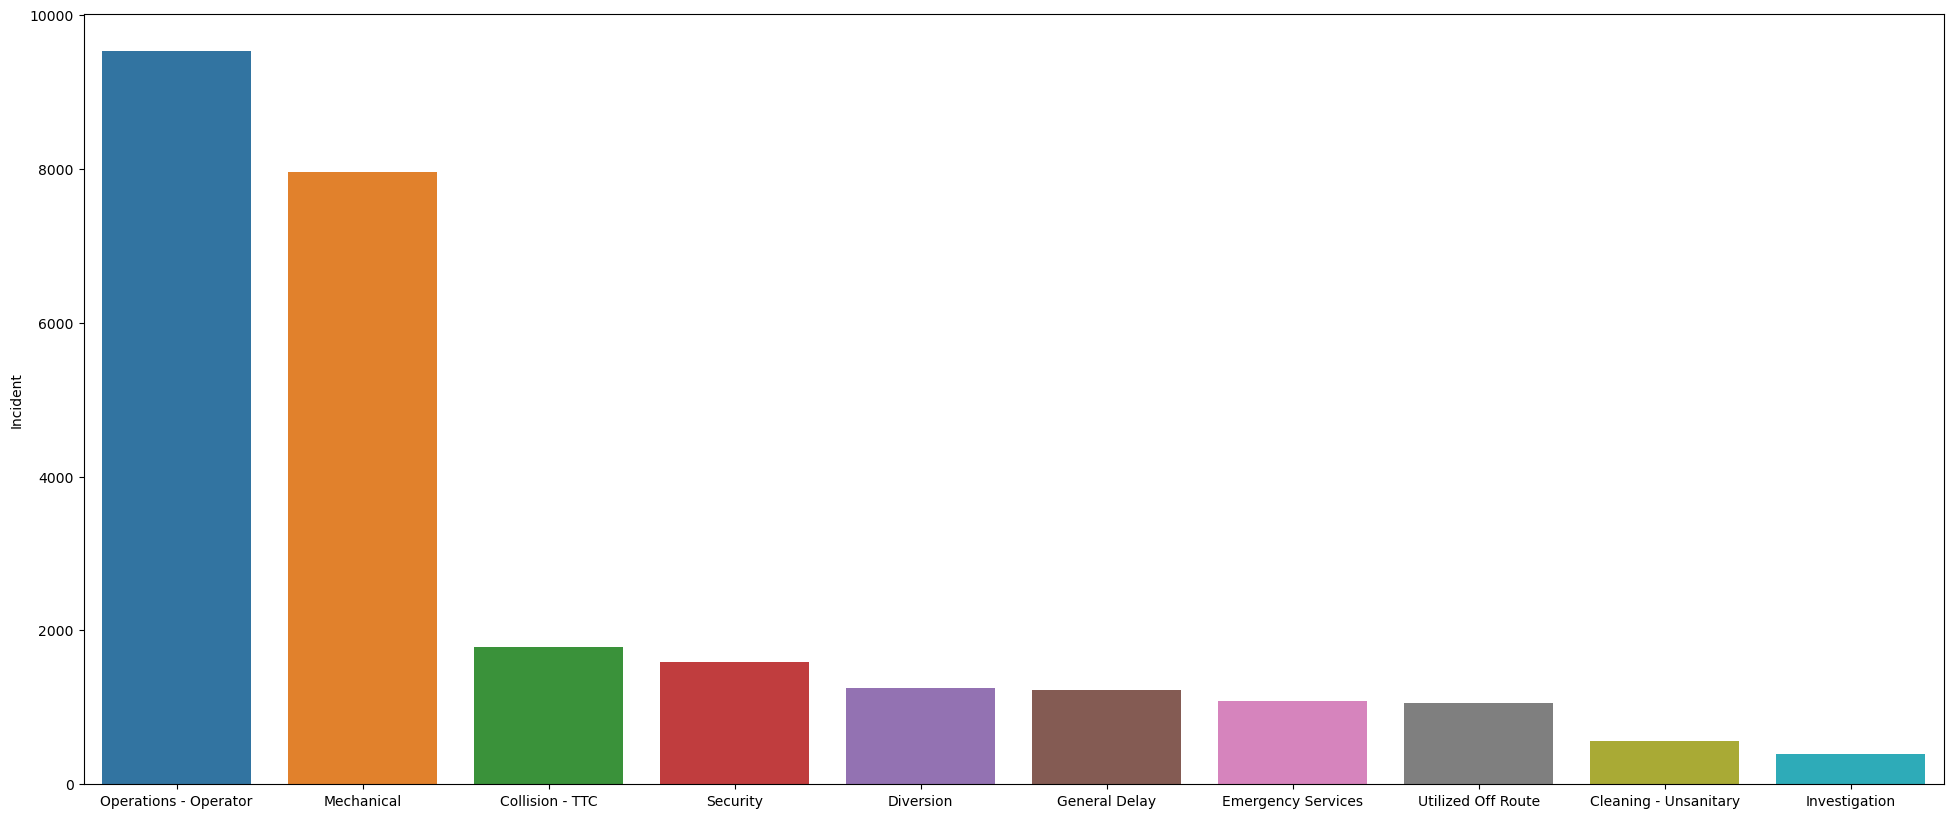

In [20]:
plt.rcParams["figure.figsize"] = (24,10)
Incident = df['Incident'].value_counts().nlargest(10)
sns.barplot(x=Incident.index, y=Incident)